# Kaggle.com

Kaggle.com самый популярный сайт для Data Scientist-ов. На сайте выложено большое количество датасетов, которые можно использовать в исследовательских целях.


## Titanic: Machine Learning from Disaster

Популярный датасет, который часто используют на курсах по основам data science. Чтобы получить данные:

* Зарегистрируйтесь на Kaggle.com
* Активируйте аккаунт
* Перейдите на страницу датасета: https://www.kaggle.com/c/titanic/data
* Нажмите Join Competition и согласитесь с условиями



In [2]:
import pandas as pd

## Посмотрим на данные


In [3]:
df = pd.read_csv('titanic/train.csv')

In [4]:
df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
69,70,0,3,"Kink, Mr. Vincenz",male,26.0,2,0,315151,8.6625,NaN,S
416,417,1,2,"Drew, Mrs. James Vivian (Lulu Thorne Christian)",female,34.0,1,1,28220,32.5000,NaN,S
726,727,1,2,"Renouf, Mrs. Peter Henry (Lillian Jefferys)",female,30.0,3,0,31027,21.0000,NaN,S
369,370,1,1,"Aubart, Mme. Leontine Pauline",female,24.0,0,0,PC 17477,69.3000,B35,C
495,496,0,3,"Yousseff, Mr. Gerious",male,NaN,0,0,2627,14.4583,NaN,C
255,256,1,3,"Touma, Mrs. Darwis (Hanne Youssef Razi)",female,29.0,0,2,2650,15.2458,NaN,C
461,462,0,3,"Morley, Mr. William",male,34.0,0,0,364506,8.0500,NaN,S
759,760,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,0,0,110152,86.5000,B77,S
607,608,1,1,"Daniel, Mr. Robert Williams",male,27.0,0,0,113804,30.5000,NaN,S
467,468,0,1,"Smart, Mr. John Montgomery",male,56.0,0,0,113792,26.5500,NaN,S



* Survived - спасся ли пассажир (да- 1 или нет - 0)
* Pclass - класс билета (1-й, 2-й или 3-Й)
* SibSp - муж/жена/братья/сестры на борту
* Parch - родители/дети на борту
* Embarked - порт посадки (С - Cherbourg, S - Southampton, Q = Queenstown)


## Проверим данные

Удобный способ взглянуть на данные df.info(). Видно, что у полей Age, Cabin и Embarked есть пустые значения. Порт посадки не указан всего у двух пассажиров, давайте укажим у них самый популярный порт:

`embarked = df.groupby('Embarked').count()['PassengerId'] 
 embarked_max = embarked[embarked == embarked.max()].index[0] 
 df.loc[df['Embarked'].isnull(), 'Embarked'] = embarked_max `

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
df.loc[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [7]:
embarked = df.groupby('Embarked').count()['PassengerId']

In [8]:
embarked

Embarked
C    168
Q     77
S    644
Name: PassengerId, dtype: int64

In [9]:
embarked[embarked == embarked.max()]

Embarked
S    644
Name: PassengerId, dtype: int64

In [10]:
embarked[embarked == embarked.max()].index[0]

'S'

In [11]:
embarked_max = embarked[embarked == embarked.max()].index[0]

In [12]:
df.loc[df['Embarked'].isnull(), 'Embarked']

61     NaN
829    NaN
Name: Embarked, dtype: object

In [13]:
df.loc[df['Embarked'].isnull(), 'Embarked'] = embarked_max

In [14]:
df.loc[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [16]:
df['Age'].median()

28.0

## Создадим колонку с титулами

Сначала получим их из колонки Name:

In [17]:
df['Name'].str.extract('([A-Za-z]+)\.').sample(10)

,0
434,Mr
625,Mr
566,Mr
292,Mr
714,Mr
263,Mr
830,Mrs
436,Miss
839,Mr
209,Mr


Положим результат в отдельную колонку и проверим, что получилось:

In [18]:
df['Title'] = df['Name'].str.extract('([A-Za-z]+)\.')
df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

## Заменим редкие титулы на более частые

Создадим словарь mapping, где пропишем для редко встречающихся титулов новые титулы для замены.

In [19]:
mapping = {'Don': 'RoyaltyM', 'Mme': 'Miss', 'Ms': 'Miss',
    'Major': 'Officer', 'Lady': 'RoyaltyF', 'Sir': 'RoyaltyM', 
    'Mlle': 'Miss', 'Col': 'Officer', 'Capt': 'Officer',
    'Countess': 'RoyaltyF', 'Jonkheer': 'RoyaltyM'}

Делаем замену. inplace=True - модифицирует датафрейм с новыми изменениями

In [20]:
df.replace({'Title': mapping}, inplace=True)
df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'RoyaltyM', 'Rev', 'Dr', 'Officer',
       'RoyaltyF'], dtype=object)

Выберем медиану возраста для каждого титула:

In [21]:
df.groupby('Title')['Age'].median()

Title
Dr          46.5
Master       3.5
Miss        21.5
Mr          30.0
Mrs         35.0
Officer     56.0
Rev         46.5
RoyaltyF    40.5
RoyaltyM    40.0
Name: Age, dtype: float64

In [22]:
age_med = df.groupby('Title')['Age'].median()

Теперь пройдем по результирующей серии в цикле и подставим возраст там, где его нет:

In [79]:
for title, age in age_med.iteritems():
    filter_age = df['Age'].isnull()
    filter_title = df['Title'] == title
    df.loc[filter_age & filter_title, 'Age'] = age

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
Title          891 non-null object
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


## Заменим Male и Female на 0 и 1:

In [96]:
asd = df

In [99]:
sex = {'male':1, 'female':0}
asd.replace({'Sex':sex}, inplace=True)

In [100]:
asd.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,Mr


## Как зависит выживание от класса билета?

In [84]:
df.pivot_table(values='PassengerId', index='Pclass', columns='Survived', aggfunc='count')

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [85]:
survived_pclass = df.pivot_table(values='PassengerId', index='Pclass', columns='Survived', aggfunc='count')

Посмотрим на графике

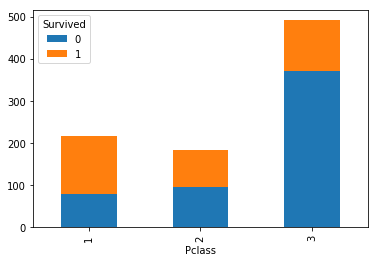

In [86]:
survived_pclass.plot(kind='bar', stacked=True)

## Как зависит выживание от титула?

In [87]:
survived_title = df.pivot_table(values='PassengerId', index='Title', columns='Survived', aggfunc='count')
survived_title

Survived,0,1
Title,,
Dr,4.0,3.0
Master,17.0,23.0
Miss,55.0,131.0
Mr,436.0,81.0
Mrs,26.0,99.0
Officer,3.0,2.0
Rev,6.0,NaN
RoyaltyF,NaN,2.0
RoyaltyM,2.0,1.0


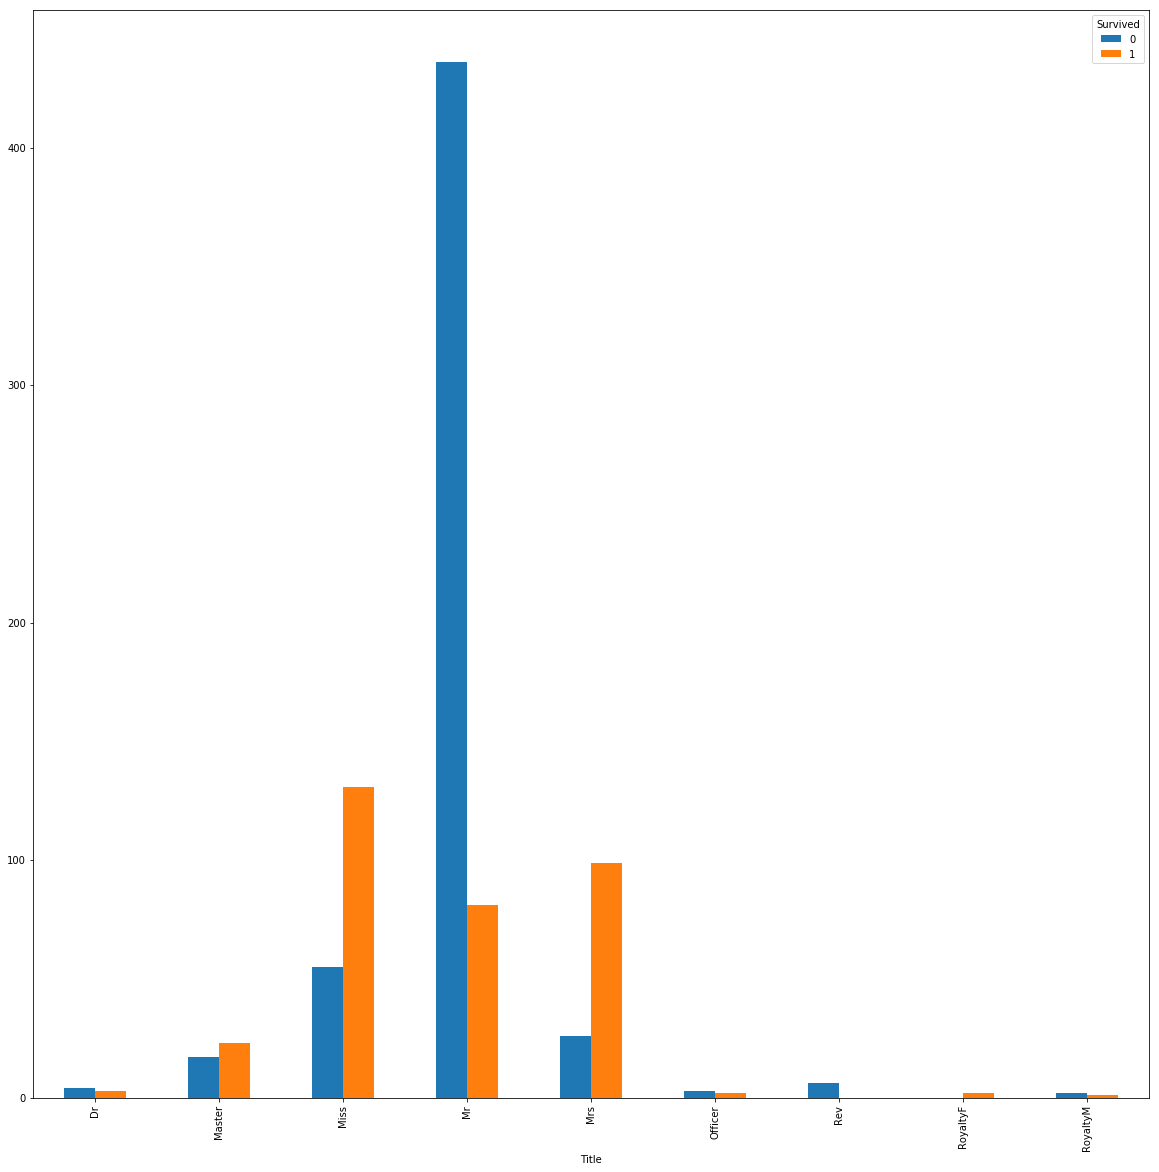

In [94]:
survived_title.plot(kind='bar', figsize=(20, 20))